# Q1 
For the following function: 
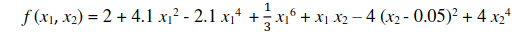

##Q1.1
Use a genetic algorithm to find the minimum of the function. Use 30 bits per chromosome 
and allow x1 and x2 to range from -5 to 5. Other hyperparameters may be the same as the 
example from Week 2. In your report you must show: 

###Q1.1 a & b
a)The fitness of the fittest individual after 100 generations, and its decoded values for x1 and x2. Remember that if you are using the inverse of the fitness within the algorithm then you will need to convert this back to actual function value. 

b)A plot of the fitness of the fittest individual across the generations.

  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 0.061757845048938095
  Max 1.3605017717778327
  Avg 1.1557799806063331
  Std 0.23177772440315797
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 1.078123603559121
  Max 1.4289233460024509
  Avg 1.3455133577750928
  Std 0.06415247095772612
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 0.0007268931010991686
  Max 1.4368604339870072
  Avg 1.3607596086467006
  Std 0.20177078201916043
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 3

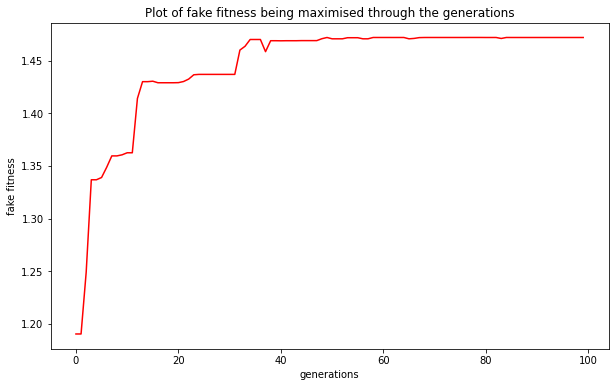

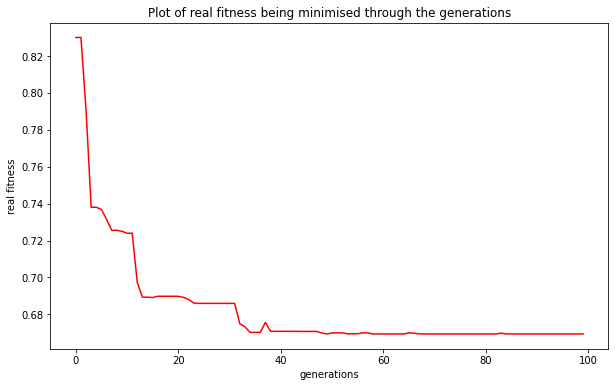

In [ ]:
# %reset #google collab to reset all variables to avoid reusing
# !pip install deap #google collab to install deap

import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms
from matplotlib import pyplot as plt
import numpy as np, numpy

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

popSize     = 50 #Population size
dimension   = 2 #Numer of decision variable x 
numOfBits   = 15 #Number of bits in the chromosomes
iterations  = 100 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
# define 'attr_bool' to be an attribute ('gene')
# which corresponds to integers sampled uniformly
# from the range [0,1] (i.e. 0 or 1 with equal
# probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
# define 'individual' to be an individual
# consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized
def eval_function(individual):
    sep=separatevariables(individual)
    f= (2+ (4.1*(sep[0]**2)) - (2.1*(sep[0]**4)) + ((1/3)*(sep[0]**6)) + (sep[0]*sep[1]) - (4*((sep[1]-0.05)**2)) + (4*(sep[1]**4)))
    return 1.0/(0.01+f), # DEAP doesn't allow minimisation for roulette selection, so we convert to maximisation

def convertRealFit(x):#convert fake min fit to real fit of the function
  return ((1/x)-0.01)
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_function)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

#----------

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-5+10*numasint/maxnum #specify range here
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:numOfBits]),chrom2real(v[numOfBits:])

def main():
    # create an initial population of individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=popSize)
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    #print(fitnesses)
    for ind, fit in zip(pop, fitnesses):
        #print(ind, fit)
        ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    bestindi = [] # variable to keep track of the best indeviduls
    # Begin the evolution
    while g < iterations:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        

    
        # Apply crossover and mutation on the offspring
        # make pairs of offspring for crossing over
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability crossProb
            if random.random() < crossProb:
                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability mutateprob
            if random.random() < mutateprob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        bestindi.append(tools.selBest(pop, 1)[0])
        if g%dspInterval ==0:
            # Gather all the fitnesses in one list and print the stats
            fits = [ind.fitness.values[0] for ind in pop]

            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual chromesome %s, maximised fake fitness %s, real fitness %s" % (best_ind, best_ind.fitness.values[0], convertRealFit(best_ind.fitness.values[0])))
    print("Decoded x1, x2 is %s, %s" % (separatevariables(best_ind)))
    
    bestindifit = [ind.fitness.values[0] for ind in bestindi] #get the fitnesses of each best individual
    plt.figure(figsize=(10,6))#make the figs larger
    plt.title("Plot of fake fitness being maximised through the generations")
    plt.plot(np.array(bestindifit), 'r')
    plt.xlabel("generations")
    plt.ylabel("fake fitness")
    plt.show()

    
    plt.figure(figsize=(10,6))#make the figs larger
    bestindifitReal = list(map(convertRealFit, bestindifit))#convert fitness values to real fitness of function
    plt.title("Plot of real fitness being minimised through the generations")
    plt.plot(np.array(bestindifitReal), 'r')
    plt.xlabel("generations")
    plt.ylabel("real fitness")
    plt.show()
    return bestindi, best_ind


if __name__ == "__main__":
    bestindi, best_ind =main()

###Q1.1 c
A 3D surface plot of the function f  across the range -2.1 < x1 < 2.1,  
and -1.1 < x2 < 1.1 (note this is just the scale of the plot. It is not asking you to change 
the bounds on x1, x2 in the GA), and a series of the fittest individual in each 
generation drawn on top of this plot, in black, with the final fittest individual in red. 

It is important to use a suitable viewing angle so that the points can be clearly seen (see Week 1 example). Note that due to the random nature of GAs it is possible that the initial population already has a best individual extremely close to the minimum (which means that the problem is already almost solved at generation zero). If this happens then run the GA again until you obtain a solution which shows a clearly visible improvement across generations, as in the above examples

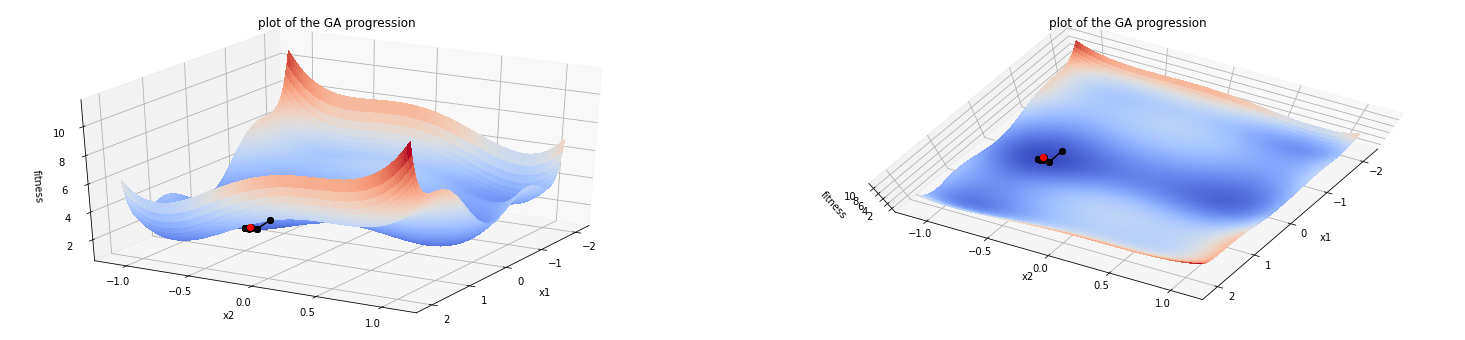

In [ ]:
from pylab import *

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D

def f(x1,x2):
    return (2+ (4.1*(x1**2)) - (2.1*(x1**4)) + ((1/3)*(x1**6)) + (x1*x2) - (4*((x2-0.05)**2)) + (4*(x2**4)))
xrange = np.linspace(-2.1, 2.1, 100)
yrange = np.linspace(-1.1, 1.1, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)


xlist=[]
ylist=[]
zlist=[]


for ind in bestindi:
  x1,x2=separatevariables(ind)
  # print("seperated variables for gens: ", x1,x2 )
  xlist.append(x1)
  ylist.append(x2)
  z=f(x1,x2)
  # print("function val z is: ", z)
  zlist.append(z)

bestx1,bestx2=separatevariables(best_ind)
bestz=f(bestx1,bestx2)
    
fig = plt.figure(figsize=(26,6))

# surface_plot with color grading
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('fitness')
ax.set_title("plot of the GA progression")
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.plot3D([bestx1], [bestx2], [bestz], color="#FF0000", marker='o', zorder=20)#red last point
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('fitness')
ax.set_title("plot of the GA progression")
ax.plot3D(xlist, ylist, zlist, color="k", marker='o', zorder=10)
ax.plot3D([bestx1], [bestx2], [bestz], color="#FF0000", marker='o', zorder=20)#red last point
ax.view_init(80, 30)


##Q1.2
Write code to implement gradient descent for the same function f. Show the equations you derived for the slope of the function in each direction x1, x2. You do not need to spend a lot of time on formatting maths in your report; you could do it on paper and include a photo in the report, or do it with simple formatting like Q.3 below. Show a 3D surface plot of the function, with the  series of improving solutions found during the descent (as in Week 1), from a suitable starting point (suitably far from the minimum). Show a second 3D plot to illustrate that a different starting point can lead to a different final solution.

In [ ]:
from scipy.spatial import distance
import numpy as np
from random import gauss
from random import randint
import matplotlib
import matplotlib.pyplot as plt

def f(x1,x2):
    return (2+ (4.1*(x1**2)) - (2.1*(x1**4)) + ((1/3)*(x1**6)) + (x1*x2) - (4*((x2-0.05)**2)) + (4*(x2**4)))
xrange = np.linspace(-2.1, 2.1, 100)
yrange = np.linspace(-1.1, 1.1, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

#working out the partial derivatives
# f (x1, x2) = 2 + 4.1(x1)^2 - 2.1(x1)^4  + (1/3)*(x1)^6 + (x1*x2) – 4((x2) - 0.05)^2 + 4*(x2)^4 
# 8.2*x1 - 8.4*x1^3 + 2*x1^5 + x2
# 0.4 + x1 - 8 x2 + 16 x2^3

def PdirX1(x1, x2): return 8.2*x1 - 8.4*x1**3 + 2*x1**5 + x2

def PdirX2(x1, x2): return 0.4 + x1 - 8*x2 + 16*x2**3

rate = 0.10 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm due to very small changes in distance
max_iters = 10000 # maximum number of iterations

The local minimum occurs at 0.09051075148279077 and  -0.7359725124751759


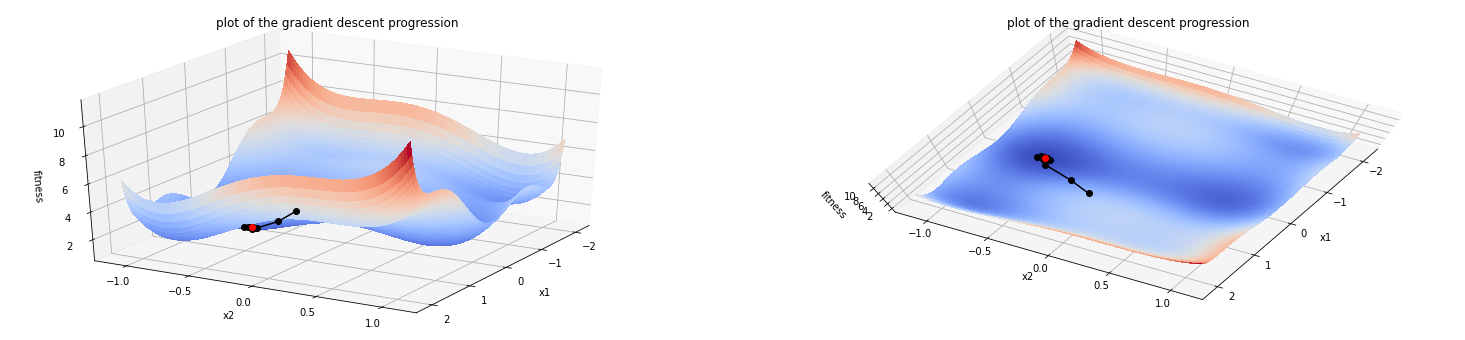

In [ ]:
previous_step_size = 1 #initalise as this will be overwritten in next gen
iters = 0 #iteration counter

cur_x = randint(-2, 2)#randomly generate values to start off in
cur_y = randint(-1, 1)

xvals = []#create lists to store history of position in each gen 
yvals = []
zvals = []

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    prev_y = cur_y

    cur_x = cur_x - rate * PdirX1(prev_x, prev_y) #Grad descent, go down the slope proportional to the rate
    cur_y = cur_y - rate * PdirX2(prev_x, prev_y) 
    xvals.append(cur_x)
    yvals.append(cur_y)
    zvals.append(f(cur_x,cur_y))

    a = (prev_x, prev_y)
    b = (cur_x, cur_y)

    previous_step_size = abs(distance.euclidean(a, b))#abs((cur_x - prev_x) + (cur_y - prev_y)) #Change in x

    iters = iters+1 #iteration count

    # print("Iteration",iters,"\nX1 value is",cur_x, "\nX2 value is",cur_y) #Print iterations
    
print("The local minimum occurs at", cur_x, "and ", cur_y)

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('fitness')
ax.set_title("plot of the gradient descent progression")
ax.plot3D(xvals, yvals, zvals, color="k", marker='o', zorder=10)
ax.plot3D([cur_x], [cur_y], [f(cur_x,cur_y)], color="#FF0000", marker='o', zorder=20)#red last point
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('fitness')
ax.set_title("plot of the gradient descent progression")
ax.plot3D(xvals, yvals, zvals, color="k", marker='o', zorder=10)
ax.plot3D([cur_x], [cur_y], [f(cur_x,cur_y)], color="#FF0000", marker='o', zorder=20)#red last point
ax.view_init(80, 30)

# Q2 
Find the minimum of the following function for 20 dimensions (n=20), using particle swarm optimisation

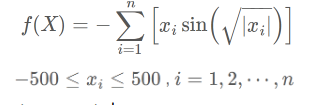

## Q2.a 
The fitness of the fittest individual after 400 generations, and its decoded value for x1, using the canonical PSO. 

In [ ]:
# !pip install deap
# %reset #del all saved variables 

import operator
import random
import numpy
import math
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

posMinInit      = -500#set inital position range (minimum)
posMaxInit      = +500#(maximum)
VMaxInit        = 1.5
VMinInit        = 0.5
populationSize  = 50
dimension       = 20
interval        = 10
iterations      = 400 

#Parameter setup

wmax = 0.9 #weighting
wmin = 0.4 
c1   = 2.0/10
c2   = 2.0/10

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 is for minimise
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)
# particle rerpresented by list of 5 things
# 1. fitness of the particle, 
# 2. speed of the particle which is also going to be a list, 
# 3.4. limit of the speed value, 
# 5. best state the particle has been in so far.

def generate(size, smin, smax):
    part = creator.Particle(random.uniform(posMinInit, posMaxInit) for _ in range(size)) 
    part.speed = [random.uniform(VMinInit, VMaxInit) for _ in range(size)]
    part.smin = smin #speed clamping values
    part.smax = smax
    return part



def updateParticle(part, best, weight):
    #implementing speed = 0.7*(weight*speed + c1*r1*(localBestPos-currentPos) + c2*r2*(globalBestPos-currentPos))
    #Note that part and part.speed are both lists of size dimension
    #hence all multiplies need to apply across lists, so using e.g. map(operator.mul, ...

    r1 = (random.uniform(0, 1) for _ in range(len(part)))
    r2 = (random.uniform(0, 1) for _ in range(len(part)))

    v_r0 = [weight*x for x in part.speed]
    v_r1 = [c1*x for x in map(operator.mul, r1, map(operator.sub, part.best, part))] # local best
    v_r2 = [c2*x for x in map(operator.mul, r2, map(operator.sub, best, part))] # global best
    
    part.speed = [0.7*x for x in map(operator.add, v_r0, map(operator.add, v_r1, v_r2))]

            
    # update position with speed
    part[:] = list(map(operator.add, part, part.speed))

def evaluateFunction(part):
  #my original attempt to create the evaluation function:
  # each = []
  # for i in range(0, dimension):
  #   fx = part[i]*math.sin(math.sqrt(abs(part[i])))
  #   each.append(fx)
  # return (sum(each)),
  #https://deap.readthedocs.io/en/master/api/benchmarks.html#deap.benchmarks.sphere
  #after checking documention the same function can be written more concisely
  return (-sum(gene*math.sin(math.sqrt(abs(gene))) for gene in part)),



toolbox = base.Toolbox()
toolbox.register("particle", generate, size=dimension, smin=-3, smax=3)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle)
toolbox.register("evaluate", evaluateFunction) #register my own function

def main():
    pop = toolbox.population(n=populationSize) # Population Size
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    best = None
    bestindi = []
    #begin main loop
    for g in range(iterations):
        w = wmax - (wmax-wmin)*g/iterations #decaying inertia weight
        
        for part in pop:
            part.fitness.values = toolbox.evaluate(part) #actually only one fitness value
            
            #update local best
            if (not part.best) or (part.best.fitness < part.fitness):   #lower fitness is better (minimising)
            #   best is None   or  current value is better              #< is overloaded        
                part.best = creator.Particle(part)
                part.best.fitness.values = part.fitness.values


            #update global best
            if (not best) or best.fitness < part.fitness:
                best = creator.Particle(part)
                best.fitness.values = part.fitness.values
            
        bestindi.append(best.fitness.values)

        for part in pop:
            toolbox.update(part, best,w)

        # Gather all the fitnesses in one list and print the stats
        # print every interval
        if g%interval==0: # interval
            logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
            print(logbook.stream)
            #print('best ',best, best.fitness)
    
    print('best particle position is ',best)
    print('best particle fitness is ',best.fitness.values[0])
    return pop, logbook, best, bestindi

if __name__ == "__main__":
    pop, logbook, best, bestindi = main()

     |████████████████████████████████| 160 kB 5.0 MB/s 
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #del, please run `%reset?` for details
Don't know how to reset  all, please run `%reset?` for details
Don't know how to reset  saved, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details
gen	evals	avg    	std    	min     	max    
0  	50   	16.8074	930.266	-2176.28	2056.16
10 	50   	-295.897	670.642	-2034.68	926.356
20 	50   	-513.296	988.965	-2660.05	965.268
30 	50   	-532.945	1201.12	-2806.29	1144.23
40 	50   	-577.354	1219.9 	-2829.33	1610.31
50 	50   	-605.887	1235.8 	-2830.69	1547.54
60 	50   	-646.246	1241.11	-2830.93	1988.06
70 	50   	-613.398	1240.16	-2831.02	1659.84
80 	50   	-585.584	1253.42	-2831.69	1124.31
90 	50   	-671.522	1217.92	-2831.7 	973.543
100	50   	-587.024	1231.34	-2831.71	1607.01
110	50   	-604.881	1262   	-2831.71	1527.22
120	50   	-560.348	1250.47	-2831.71	1069.48
130	

## Q2.b
A plot of the fitness of the global best individual across the generations, using the canonical PSO.

400
[(-1612.8333767153051,), (-1632.759890690692,), (-1768.2664391845253,)]


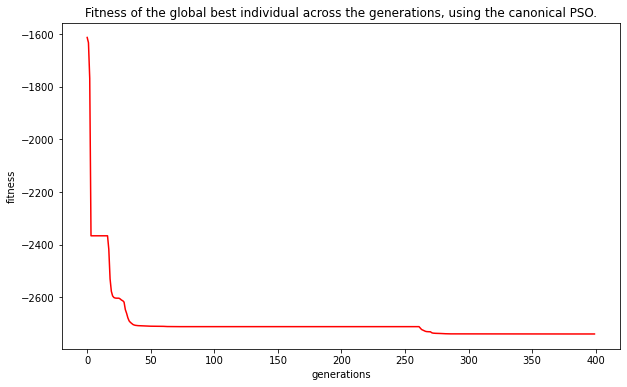

In [ ]:
from matplotlib import pyplot as plt
import numpy as np, numpy

print(len(bestindi))#check gens
print(bestindi[0:3])#checl vals look sensible

plt.figure(figsize=(10,6))#make the figs larger
plt.title("Fitness of the global best individual across the generations, using the canonical PSO.")
plt.xlabel("generations")
plt.ylabel("fitness")
plt.plot(np.array(bestindi), 'r')
plt.show()

## Q2.c
A plot of the fitness of the global best individual across the generations, using the social learning PSO (SL-PSO). 

In [ ]:
# %reset
# !pip install deap

import operator
import random
import numpy
import math
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

posMinInit      = -500#difficulty with setting this to 500 as x values tend to explode in magnitude (but less often when set to 50 &-50)
posMaxInit      = +500#could add a invalid particle step in
VMaxInit        = 1.5
VMinInit        = 0.5
dimension       = 20
interval        = 10
iterations      = 400
populationSize  = 50

#variables used in SL-PSO
epsilon = dimension/100.0*0.01 # social influence of swarm centre


# function to get the mean positions of the inviduals (swarm centre)
def getcenter(pop):
    center=list()
    for j in range(dimension): # count through dimensions
        centerj = 0
        for i in pop: # for each particle
            centerj += i[j] # sum up position in dimention j
        centerj /= populationSize # Average
        center.append(centerj)
    return center


creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 is for minimise
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)
# particle rerpresented by list of 5 things
# 1. fitness of the particle, 
# 2. speed of the particle which is also going to be a list, 
# 3.4. limit of the speed value, 
# 5. best state the particle has been in so far.

def generate(size, smin, smax):
    part = creator.Particle(random.uniform(posMinInit, posMaxInit) for _ in range(size)) 
    part.speed = [random.uniform(VMinInit, VMaxInit) for _ in range(size)]
    part.smin = smin #speed clamping values
    part.smax = smax
    return part



def updateParticle(part,pop,center,i):
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)
    r3 = random.uniform(0, 1)
    
    #Randomly choose a demonstrator for particle i from any of particles 0 to i-1, the Particle i 
    #updates its velocity by learning from the demonstrator and the mean position of the swarm
    demonstrator=random.choice(list(pop[0:i]))
    
    for j in range(dimension): # count through dimensions#
        part.speed[j]=r1*part.speed[j]+r2*(demonstrator[j]-part[j])+r3*epsilon*(center[j]-part[j])
        part[j]=part[j]+part.speed[j]
        # #add wall bouncing
        if abs(part[j])>abs(posMaxInit):#if out of bounds
          # part.speed[j]=-part.speed[j]*0.5#reverse speed and slow down #still not enough, can oscilate on bounds
          part[j]=random.uniform(posMinInit, posMaxInit)#reinit the particle pos

def evaluateFunction(part):#evaluation function from last part
  return (-sum(gene*math.sin(math.sqrt(abs(gene))) for gene in part)),


toolbox = base.Toolbox()
toolbox.register("particle", generate, size=dimension, smin=-3, smax=3)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle)
toolbox.register("evaluate", evaluateFunction) #sphere function is built-in in DEAP

def main():
    pop = toolbox.population(n=populationSize) # Population Size
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    #intialize the learning probabilities
    prob=[0]*populationSize
    for i  in range(len(pop)):
        prob[populationSize - i - 1] = 1 - i/(populationSize - 1)
        prob[populationSize - i - 1] = pow(prob[populationSize - i - 1], math.log(math.sqrt(math.ceil(dimension/100.0))))

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    bestindi = []
    #begin main loop
    for g in range(iterations):

        for part in pop:
            part.fitness.values = toolbox.evaluate(part) #actually only one fitness value

        #Sort the individuals in the swarm in ascending order. i.e., particle 0 is the best
        pop.sort(key=lambda x: x.fitness, reverse=True)

        # bestindi.append(toolbox.evaluate(pop[0]))
        bestindi.append(pop[0].fitness.values)

        #calculate the center (mean value) of the swarm
        center = getcenter(pop)
        
        for i  in reversed(range(len(pop)-1)):  # start with worst particle, and go in reverse towards best
                                                # don't do element 0 (best). Hence the i+1 below.
            if random.uniform(0, 1)<prob[i+1]: #learning probability for that particle
                toolbox.update(pop[i+1],pop,center,i+1)
        
        

        # Gather all the fitnesses in one list and print the stats
        # print every interval
        if g%interval==0: # interval
            logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
            print(logbook.stream)
    print('best particle position is ',pop[0])
    print("max x in particle position is ", max(pop[0]))
    print("min x in particle position is ", min(pop[0]))
    print('best particle fitness is ',pop[0].fitness.values[0])
    return pop, logbook, bestindi

if __name__ == "__main__":
    pop, logbook, bestindi= main()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	evals	avg    	std    	min     	max    
0  	50   	147.771	886.195	-1365.89	2140.52
10 	50   	-241.048	842.705	-2598.76	1794.33
20 	50   	-1008.42	925.717	-3019.32	762.909
30 	50   	-2785.53	945.709	-3880.28	231.801
40 	50   	-3727.63	415.127	-4011.18	-2017.1
50 	50   	-4013.17	111.369	-4048.88	-3331.06
60 	50   	-4078.77	7.40545	-4094.27	-4059.43
70 	50   	-4102.77	1.23778	-4105.52	-4098.63
80 	50   	-4109.04	0.828988	-4111.23	-4107.47
90 	50   	-4116.47	1.27433 	-4119.64	-4113.47
100	50   	-4125.2 	1.08251 	-4126.91	-4122.49
110	50   	-4133.06	1.27849 	-4135.57	-4128.87
120	50   	-4143.11	1.34625 	-4145.34	-4139.64
130	50   	-4149.77	0.959835	-4150.64	-4144.37
140	50   	-4150.83	0.164603	-4151.03	-4150.04
150	50   	-4151.38	0.0750677	-4151.54	-4151.15
160	50   	-4151.89	0.0545565	-4152.04	-4151.79
170	50   	-4152.3 	0.0326098	-4152.35	-4152.21
180	50   	-4152.59	0.0361143	-4152.65	-4152.52
190	50   	-4152.96	0.0516399	-4153.08	-4152.84
200	50   	-4153.26	0.0311579	-4153.32	-4153.19

400


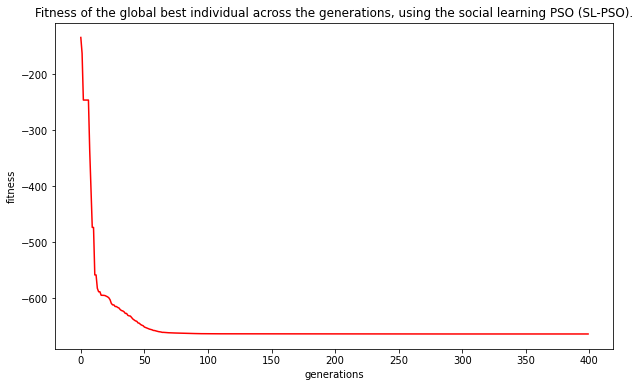

In [ ]:
from matplotlib import pyplot as plt
import numpy as np, numpy

print(len(bestindi))

plt.figure(figsize=(10,6))#make the figs larger
plt.title("Fitness of the global best individual across the generations, using the social learning PSO (SL-PSO).")
plt.xlabel("generations")
plt.ylabel("fitness")
plt.plot(np.array(bestindi), 'r')

# Q3
This task is to solve the following multi-objective optimisation problem using the elitist non-dominated sorting genetic algorithm (NSGA-II), using a programming language of your choice. 

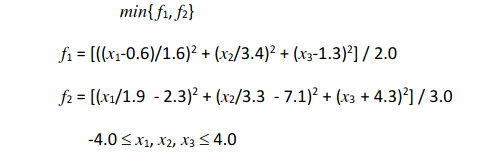

## all together 3.1 - 3.5

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
gen	evals	std	min                    	avg	max                      
0  	24   	   	[0.68989341 1.04739402]	   	[13.57337072 32.05708869]

Table of all x1,x2,x3,f1,f2
2.546875 3.59375 0.96875 1.3537695547453672 23.065065503177667
2.7578125 -2.5078125 -2.8046875 9.605655881954311 16.73535183357951
-3.5859375 -0.625 -0.328125 4.764570887542512 32.057088690112295
0.4609375 2.359375 -2.4453125 7.258231964177326 1.717754648478077
0.015625 0.0859375 2.5546875 0.8541378670662744 15.662926015246278
1.3984375 -0.5859375 -0.734375 2.208702615982108 8.32004298779883
0.125 3.1015625 -2.7578125 8.693065079949719 1.0473940163680169
-3.1796875 2.46875 -0.640625 4.936867154197297 25.667725534201338
2.1875 -0.6875 2.0546875 0.7974382383353156 23.440670737480527
0.21875 2.640625 0.0625 1.095688139707572 6.604455451436981
0.5234375 -1.546875 -0.9921875 2.7317024263296155 4.273249683609079
-2.0234375 1.0 3.6015625 4.03607106515693 29.3644375821

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


,x1,x2,x3,f1,f2
0,2.546875,3.593750,0.968750,1.353770,23.065066
1,2.757812,-2.507812,-2.804688,9.605656,16.735352
2,-3.585938,-0.625000,-0.328125,4.764571,32.057089
3,0.460938,2.359375,-2.445312,7.258232,1.717755
4,0.015625,0.085938,2.554688,0.854138,15.662926
5,1.398438,-0.585938,-0.734375,2.208703,8.320043
6,0.125000,3.101562,-2.757812,8.693065,1.047394
7,-3.179688,2.468750,-0.640625,4.936867,25.667726
8,2.187500,-0.687500,2.054688,0.797438,23.440671
9,0.218750,2.640625,0.062500,1.095688,6.604455


End of Table


Table of all f1,f2,front
0.6898934126065264 9.150397994304738 1
0.9475860786437988 8.507812759808006 1
1.095688139707572 6.604455451436981 1
2.7317024263296155 4.273249683609079 1
7.258231964177326 1.717754648478077 1
8.693065079949719 1.0473940163680169 1
0.7974382383353156 23.440670737480527 2
0.8541378670662744 15.662926015246278 2
1.4809099140629227 13.112609049479168 2
2.208702615982108 8.32004298779883 2
3.6030893612237946 6.9164217122395835 2
13.453076858520507 5.147646993846667 2
1.3537695547453672 23.065065503177667 3
2.796125855759353 21.989884392763884 3
3.001762511837441 19.63718894951452 3
9.605655881954311 16.73535183357951 3
2.1267059358511005 26.180454232875444 4
2.605924803261938 24.822797051286216 4
3.1696839265922363 23.409044596354168 4
4.03607106515693 29.364437582169217 5
4.936867154197297 25.667725534201338 5
4.764570887542512 32.057088690112295 6
6.931501467021691 28.528821928494533 6
13.573370720622446 26.132135024418584 6
pretty print table in p

,f1,f2,front
0,0.689893,9.150398,1
1,0.947586,8.507813,1
2,1.095688,6.604455,1
3,2.731702,4.273250,1
4,7.258232,1.717755,1
5,8.693065,1.047394,1
6,0.797438,23.440671,2
7,0.854138,15.662926,2
8,1.480910,13.112609,2
9,2.208703,8.320043,2


End of Table

number of fronts is: 6


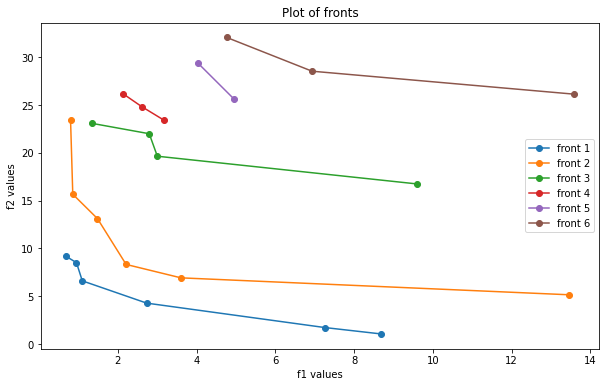


Table of all f1,f2,front,crowding dist
0.6898934126065264 9.150397994304738 1 inf
0.9475860786437988 8.507812759808006 1 0.18245080462335694
1.095688139707572 6.604455451436981 1 0.37275895916058654
2.7317024263296155 4.273249683609079 1 0.6865427195121074
7.258231964177326 1.717754648478077 1 0.5714905817893086
8.693065079949719 1.0473940163680169 1 inf
0.7974382383353156 23.440670737480527 2 inf
0.8541378670662744 15.662926015246278 2 0.3092977478329066
1.4809099140629227 13.112609049479168 2 0.25421798435776927
2.208702615982108 8.32004298779883 2 0.2532025367113299
3.6030893612237946 6.9164217122395835 2 0.5309541938137556
13.453076858520507 5.147646993846667 2 inf
1.3537695547453672 23.065065503177667 3 inf
2.796125855759353 21.989884392763884 3 0.37063211850113154
3.001762511837441 19.63718894951452 3 0.8276731895702387
9.605655881954311 16.73535183357951 3 inf
2.1267059358511005 26.180454232875444 4 inf
2.605924803261938 24.822797051286216 4 1.0
3.1696839265922363 23.4090445963

,f1,f2,front,crowding dist
0,0.689893,9.150398,1,inf
1,0.947586,8.507813,1,0.182451
2,1.095688,6.604455,1,0.372759
3,2.731702,4.273250,1,0.686543
4,7.258232,1.717755,1,0.571491
5,8.693065,1.047394,1,inf
6,0.797438,23.440671,2,inf
7,0.854138,15.662926,2,0.309298
8,1.480910,13.112609,2,0.254218
9,2.208703,8.320043,2,0.253203


End of Table

3.4 plot


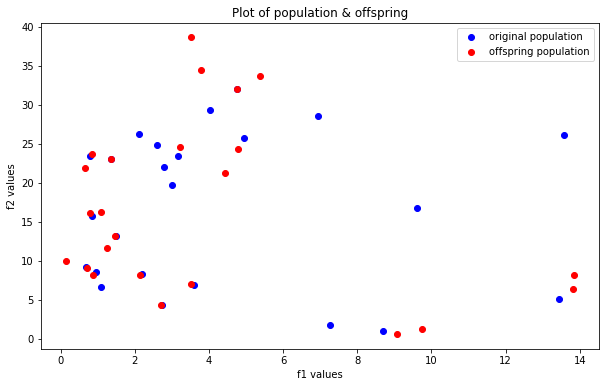

3.5 plot


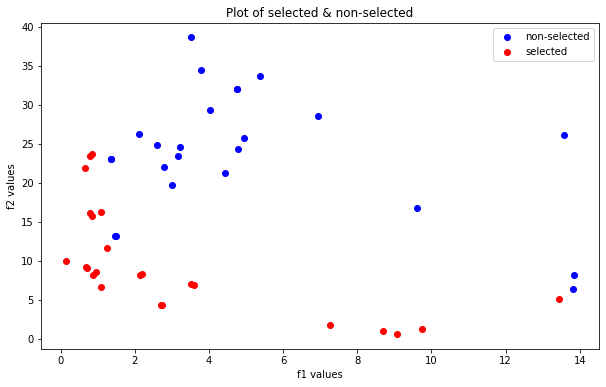

In [ ]:
%reset
!pip install deap

import array
import random
import json

import numpy

from math import sqrt

from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence, hypervolume
from deap import creator
from deap import tools
import matplotlib.pyplot as plt

from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

numOfBits = 10
maxnum      = 2**numOfBits

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-4+8*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:10]),chrom2real(v[10:20]), chrom2real(v[20:30])


def calcFitness(individual):
  x1,x2,x3 = separatevariables(individual)#convert from grey to binary to real number

  f1=( ((x1-0.6)/1.6)**2 + (x2/3.4)**2 + (x3-1.3)**2   )/2.0
  f2=( ((x1)/(1.9-2.3))**2 + (x2/(3.3-7.1))**2  +  (x3+4.3)**2    )/3.0
  return f1,f2    
    
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 30) #set total ind bits
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", calcFitness)

exchangeChance = 0.9#specify an exchange chance for later questions

toolbox.register("mate", tools.cxUniform, indpb=exchangeChance) #change to cx unifrom 0.9
flipProb=1.0/30 #change to be 1/cromesome len
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb) 
# toolbox.register("select", tools.selNSGA2)

random.seed()

NGEN = 30 #number of generations
MU = 24 #number of selected population at the end of each generation

stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", numpy.mean, axis=0)
# stats.register("std", numpy.std, axis=0)
stats.register("min", numpy.min, axis=0)
stats.register("max", numpy.max, axis=0)

logbook = tools.Logbook()
logbook.header = "gen", "evals", "std", "min", "avg", "max"

pop = toolbox.population(n=MU)

# Evaluate the individuals with an invalid fitness
invalid_ind = [ind for ind in pop if not ind.fitness.valid]
fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit

record = stats.compile(pop)
logbook.record(gen=0, evals=len(invalid_ind), **record)
print(logbook.stream)

#-----------------------------------------------------------------------------------3.1
# Encode the decision variables using Gray coding, each using 10 bits. Set the population size to 24 
# and randomly generate an initial population. List the 24 initial solutions in a table in the following format:
# 'x1', 'x2','x3','f1','f2' and for the xi values give the decoded values not bit strings

from tabulate import tabulate
import pandas as pd
questionThreePointOneTable = []#empty list to populate with info
print("\nTable of all x1,x2,x3,f1,f2")
#list all values x1,x2,x3,f1,f2
for indi in pop:
  print(separatevariables(indi)[0], separatevariables(indi)[1], separatevariables(indi)[2], indi.fitness.values[0], indi.fitness.values[1]) #for rough print
  questionThreePointOneTable.append([separatevariables(indi)[0], separatevariables(indi)[1], separatevariables(indi)[2], indi.fitness.values[0], indi.fitness.values[1]]) #for pretty print
print("pretty print of same table")
# print(tabulate(questionThreePointOneTable, headers=['x1', 'x2','x3','f1','f2'], tablefmt='orgtbl'))#pretty print using tabulate

df = pd.DataFrame(questionThreePointOneTable, columns = ['x1', 'x2','x3','f1','f2'])
# print(df)#print like format
display(df)#displays pretty dataframe using pandas

print("End of Table\n")

#-------------------------------------------------------------------------------------3.2
# Sort the solutions in the initial generation using the efficient non-dominated sorting.
# NOTE: DEAP does not implement the efficient non-dominated sorting; to get full marks you need to 
# code this yourself using the algorithm specified in the lecture (Week 4). List the solutions 
# together with their front number in a table in the following format and sort them according to the 
# front number in an ascending order. Print out the sorted individuals in objective values and front number. 
# Also show a 2D plot of the solutions in objective space, indicating which belong on the same fronts. 
# In your table highlight the worst objective value in f1: f1* = max{f1i }, i = 1, ..., 24, and 
# the worst objective value in f2: f2* = max{ f2i }, i=1, ..., 24.
# FORMAT: f1, f2, front number

import numpy as np, numpy
def dominates(X1, X2):
    # if(np.any(X1 < X2) and np.all(X1 <= X2)):
    # print(X1, X2)
    if((X1[0]< X2[0] or X1[1]< X2[1])  and (X1[0]<= X2[0] and X1[1]<= X2[1])): #need to compare both each time even when sorted by f1
    # if( (X1[1]< X2[1]) and (X1[1]<= X2[1])): # cant optimise like this it doesnt work.
        return True
    else:
        return False

#Efficient Non-Dominated Sorting
def EffNonDomSort(solPN, SetOfFronts):
  x=len(SetOfFronts)
  k=1 #the front now checked
  if x>0:
    while True:
      isDominated = False
      #compare solPn with sols in fronts[k]
      
      # print("k is:" ,k)
      for sol in reversed(SetOfFronts[k-1]): #check if its dominated by any of them
        if dominates(sol, solPN): 
          isDominated = True
          break

      if not isDominated:#SetOfFronts[k] contains no sol dom solPN
        # print("added to front k", k)
        SetOfFronts[k-1].append(solPN)# move PN to fronts[k]
        return k 
        break
      else:
        k=k+1
        if k>x:
          # print("added new front", x+1)
          SetOfFronts.append([solPN])# move Pn to a new front
          return (x+1) 
          break
    # return #front num of solPN
  else:
    # print("added start value")
    SetOfFronts.append([solPN])
    return k

#-----------------------------------------------------------3.2 cont
SetOfFronts = []
pop.sort(key=lambda tup: tup.fitness.values[0]) #sort by f1 values

for indi in pop:
  indi.front = EffNonDomSort(indi.fitness.values, SetOfFronts)#give each individual a front while iteratively building the set of fronts

pop.sort(key=lambda tup: tup.front)#sort by front

QuestionThreePointTwoTable = []#empty list to store info

print("\nTable of all f1,f2,front")
#list all values f1,f2,front
for indi in pop:
  print(indi.fitness.values[0], indi.fitness.values[1], indi.front)
  QuestionThreePointTwoTable.append([indi.fitness.values[0], indi.fitness.values[1], indi.front])

print("pretty print table in pandas with max value highlighting")
df = pd.DataFrame(QuestionThreePointTwoTable, columns = ['f1','f2','front'])#define the dataframe
display(df.style.highlight_max(subset = ['f1','f2'], color = 'green'))#display dataframe with max value highlighting

print("End of Table\n")

from matplotlib import pyplot as plt
maxfront = pop[-1].front #select last pop's front num when sorted acending by fronts


print("number of fronts is:",maxfront)
plt.figure(figsize=(10,6))#make the figs larger
for i in range(1,maxfront+1):#for each front
  frontf1 = [x.fitness.values[0] for x in pop if x.front == i]#get the f1 values at that front
  frontf2 = [x.fitness.values[1] for x in pop if x.front == i]#also get the f2 values
  # print(frontn)
  plt.plot(frontf1, frontf2, marker= 'o', label='front '+str(i))#plot those f1 & f2 values as series giving front label
  
plt.xlabel("f1 values")
plt.ylabel("f2 values")
plt.title("Plot of fronts")
plt.legend(loc="best")
plt.show()

#-------------------------------------------------------3.3
# Calculate the crowding distance of each individual in the initial population. 
# Add the resulting crowding distance of each individual to your table of 3.2 in the following format. 
# f1, f2, front number, crowding distance

from deap import tools
for i in range(1,maxfront+1):#take each front and pass to assign crowding distance
  front = [x for x in pop if x.front == i]#individuals only in that front
  tools.emo.assignCrowdingDist(front)#python allows us to set values using references from list comprehension

QuestionThreePointThreeDistances = []
print("\nTable of all f1,f2,front,crowding dist")
#list all values f1,f2,front,crowding dist
for indi in pop:
  print(indi.fitness.values[0], indi.fitness.values[1], indi.front, indi.fitness.crowding_dist)#crowding dist of inital pop already calulated by select
  QuestionThreePointThreeDistances.append(indi.fitness.crowding_dist)

print("pretty print table from last question with distanes added")
df['crowding dist'] = QuestionThreePointThreeDistances #add in extra column
display(df.style.highlight_max(subset = ['f1','f2'], color = 'green'))
print("End of Table\n")

#------------------------------------------------------3.4
# Apply tournament selection to select parent individuals for reproduction. 
# Consider dominance and crowding distance in the selection. Create 24 offspring individuals. 
# Select individuals for crossover at a probability of 0.9 and apply uniform crossover. 
# Apply flip mutation at a probability that is inversely proportional to the length of the chromosome for each bit. 
# Plot the 24 offspring individuals together with the parents in the objective space. 
# Visualize the parent and offspring individuals using different colours.

offspring = tools.selTournamentDCD(pop, len(pop))#do tournament select for mating
offspring = [toolbox.clone(ind) for ind in offspring]
for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
#make pairs of all (even,odd) in offspring
    # if random.random() <= CXPB:#no need to use this when the chance is specified in the register
    toolbox.mate(ind1, ind2)
    
    toolbox.mutate(ind1)
    toolbox.mutate(ind2)
    del ind1.fitness.values, ind2.fitness.values

# Evaluate the individuals with an invalid fitness
invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit

pop.sort(key=lambda x: x.fitness.values)#sort by f1
offspring.sort(key=lambda x: x.fitness.values)

print("3.4 plot")
plt.figure(figsize=(10,6))#make the figs larger
front = numpy.array([ind.fitness.values for ind in pop])
plt.scatter(front[:,0], front[:,1], c="b", label="original population") #blue for original parent population

front = numpy.array([ind.fitness.values for ind in offspring])
plt.scatter(front[:,0], front[:,1], c="r", label="offspring population") #red for offspring

plt.legend(loc="best")
plt.xlabel("f1 values")
plt.ylabel("f2 values")
plt.title("Plot of population & offspring")
plt.axis("tight")
plt.show()

#------------------------------------------------------------------------------3.5
# Combine the 24 offspring individuals with the 24 parent individuals. Then select 24
# individuals from the combined population using the crowded non-dominated sorting
# method. Plot the combined population (48 individuals) in the objective space. Highlight the
# 24 selected solutions using a different colour. 

#define select func
def selectTournement(individuals, k):
  SetOfFrontsSelect = []#empty list to create the list of fronts

  individuals.sort(key= lambda X: X.fitness.values[0])#sort by f1 value acending

  for indi in individuals:
    indi.front = EffNonDomSort(indi.fitness.values, SetOfFronts)#find front for each individual in individuals

  individuals.sort(key = lambda x: x.front)#sort by fronts
  maxfront = individuals[-1].front#get max front as last
  # print("max fronts is:" , maxfront)
  
  for i in range(1,maxfront+1):#for each front
    front = [x for x in individuals if x.front == i]#get the front individuals
    tools.emo.assignCrowdingDist(front)#assign crowding distance for the front

  individuals.sort(key = lambda x: (x.front, -x.fitness.crowding_dist))#sort by front then crowding dist (in opposite direction)

  chosen = individuals[:k]#take the first k individuals when ordered by front then crowding dist

  return chosen
#------------------------------------------------------------------------------
#register select func
toolbox.register("select", selectTournement)#register my function

selectedPop = toolbox.select(pop + offspring, MU)#Select with my own selection function (to go to next gen)
nonSelected = [x for x in (pop + offspring) if x not in selectedPop] #get the non selected = (total pop - selected)
print("3.5 plot")
front = numpy.array([ind.fitness.values for ind in nonSelected])#get the fitness values for the non-selected pop
plt.figure(figsize=(10,6))#make the figs larger
plt.scatter(front[:,0], front[:,1], c="b", label="non-selected") #blue for the non selected pop

front = numpy.array([ind.fitness.values for ind in selectedPop])#get the fitness values for the selected pop
plt.scatter(front[:,0], front[:,1], c="r", label="selected") #red for selected pop

plt.legend(loc="best")
plt.xlabel("f1 values")
plt.ylabel("f2 values")
plt.title("Plot of selected & non-selected")
plt.axis("tight")
plt.show()

### Example results for 3.1 - 3.5

## Code for 3.6

worst objective f1&f2 are: 13.573370720622446 32.057088690112295
1  	24   	   	[0.15262048 0.59974182]	   	[ 9.75739836 15.26695128]
2  	24   	   	[0.15262048 0.59903595]	   	[ 9.74739676 10.0198246 ]
3  	24   	   	[0.05374936 0.49249402]	   	[10.32730559  9.85282998]
4  	24   	   	[0.04910309 0.46426843]	   	[10.2819494   9.85035025]
5  	24   	   	[0.04291693 0.32900979]	   	[10.71530619 10.22295536]
6  	24   	   	[0.04022471 0.32900979]	   	[10.71530619 10.33574536]
7  	24   	   	[0.02486826 0.24405626]	   	[11.32578847 11.31717439]
8  	24   	   	[0.02486826 0.12307746]	   	[12.55258148 11.31717439]
9  	24   	   	[0.02486826 0.12307746]	   	[12.55258148 11.31717439]
10 	24   	   	[0.02486826 0.12307746]	   	[12.55258148 11.31717439]
11 	24   	   	[0.02486826 0.12307746]	   	[12.55258148 11.31717439]
12 	24   	   	[0.02464653 0.08041388]	   	[13.14483611 11.33434053]
13 	24   	   	[0.02464653 0.08041388]	   	[13.14483611 11.33434053]
14 	24   	   	[0.02464653 0.07976165]	   	[13.18855

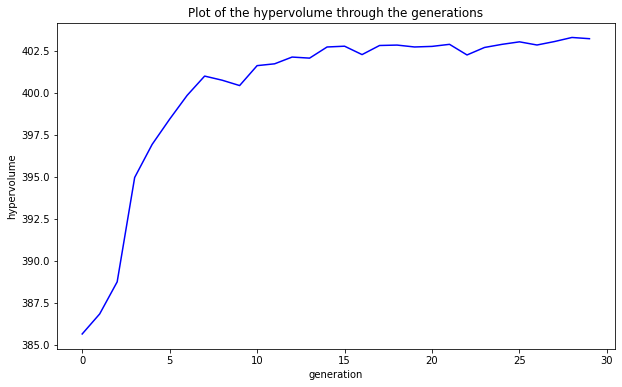

3.6 plot last generation with red point being worst values as hypervolume ref point


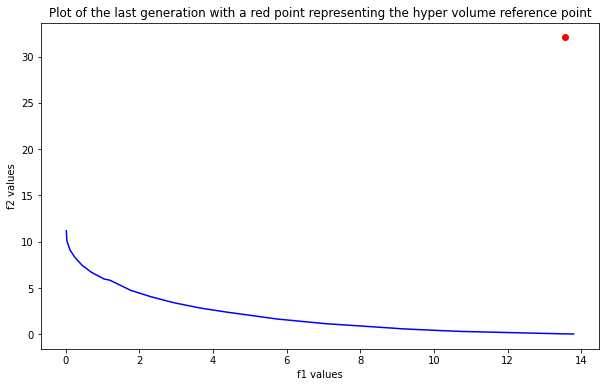

In [ ]:
# Run the evolution for 30 generations by repeating the above steps. Calculate the
# hypervolume using the worst objective values ( f1*, f2*) obtained in Question 3.2 as the
# reference point (i.e. keep this as reference point for all generations) and 

#plot the hypervolume of the non-dominated solutions over the generations. Note that hypervolume 
# is a scalar value, so you are just plotting a scalar hypervolume value (y-axis) versus
# generation (x-axis), you are not asked to draw the hypervolume in f1, f2 space.

# Also plot (in a separate plot) the final generation of solutions in objective space, along with
# the reference point in a different colour. 
#----------------------------------------------------------
#save worst worst objective values ( f1*, f2*) for the hypervol ref point from starting pop 3.2
worstF1 = max([x.fitness.values[0] for x in pop])
worstF2 = max([x.fitness.values[1] for x in pop])
print("worst objective f1&f2 are:", worstF1, worstF2)

pop = selectedPop #start with what we just made

hyperVolumes = []
hyperVolumes.append(hypervolume(pop, [worstF1, worstF2]))#add inital pop hyper vol
#---------------------------------------------------------
# Begin the generational process
for gen in range(1, NGEN):
    # Vary the population
    offspring = tools.selTournamentDCD(pop, len(pop))#toolbox.select(pop,MU)#
    # selTournamentDCD means Tournament selection based on dominance (D) 
    # followed by crowding distance (CD). This selection requires the 
    # individuals to have a crowding_dist attribute
    offspring = [toolbox.clone(ind) for ind in offspring]
    
    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
    #make pairs of all (even,odd) in offspring
        # if random.random() <= CXPB:#no need to use this when the chance is specified in the register
        toolbox.mate(ind1, ind2)
        
        toolbox.mutate(ind1)
        toolbox.mutate(ind2)
        del ind1.fitness.values, ind2.fitness.values
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Select the next generation population
    pop = toolbox.select(pop + offspring, MU)#select with my select function defined & registered earlier
    record = stats.compile(pop)
    logbook.record(gen=gen, evals=len(invalid_ind), **record)
    print(logbook.stream)
    hyperVolumes.append(hypervolume(pop, [worstF1, worstF2]))#add new gen pop hypervol to list

print("Final population hypervolume is %f" % hypervolume(pop, [worstF1, worstF2]))

print("3.6 plot hypervol through generations: 0th init to 30th gen")
plt.figure(figsize=(10,6))
plt.plot(range(0, NGEN), hyperVolumes, c="b") #blue for the non selected pop
#plot the hyper volume list as y and the generations as x
plt.xlabel("generation")
plt.ylabel("hypervolume")
plt.title("Plot of the hypervolume through the generations")
plt.axis("tight")
plt.show()


print("3.6 plot last generation with red point being worst values as hypervolume ref point")
pop.sort(key=lambda x: x.fitness.values)#sort by fitness values
front = numpy.array([ind.fitness.values for ind in pop])#get the fitness values from the last gen
plt.figure(figsize=(10,6))
plt.plot(front[:,0], front[:,1], c="b")#plot each solution by its fitness values
plt.scatter(worstF1, worstF2, c="r")# add worst f1, f2 in red as point
plt.xlabel("f1 values")
plt.ylabel("f2 values")
plt.title("Plot of the last generation with a red point representing the hyper volume reference point")
plt.axis("tight")
plt.show()

### Example results from 3.6

# Code appendix

## other code examples

started out with the crowding distance function from this for Q3

In [ ]:
# Program Name: NSGA-II.py
# Description: This is a python implementation of Prof. Kalyanmoy Deb's popular NSGA-II algorithm
#    The non dominated sort and crowding distance are written out here in full
#    because this implementation is not making use of any GA library.
# Author: Haris Ali Khan 
# Supervisor: Prof. Manoj Kumar Tiwari

#Importing required modules
import math
import random
import matplotlib.pyplot as plt

# #First function to optimize
# def function1(x1,x2,x3):
#     value = ( ((x1-0.6)/1.6)**2 + (x2/3.4)**2 + (x3-1.3)**2   )/2.0
#     return value

# #Second function to optimize
# def function2(x1,x2,x3):
#     value = ( ((x1)/(1.9-2.3))**2 + (x2/(3.3-7.1))**2  +  (x3+4.3)**2    )/3.0
#     return value

#First function to optimize
def function1(x):
    value = -x**2
    return value

#Second function to optimize
def function2(x):
    value = -(x-2)**2
    return value

#Function to find index of list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

#Function to carry out the crossover
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

#Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution

#Main program starts here
pop_size = 20
max_gen = 921

#Initialization
min_x=-55
max_x=55
solution=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
gen_no=0
while(gen_no<max_gen):
    function1_values = [function1(solution[i])for i in range(0,pop_size)]
    function2_values = [function2(solution[i])for i in range(0,pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    print(function1_values[:], '\n')
    print(function2_values[:])
    print("here!!!!!!!!!!!!!!!!!!!!!!!!!!!!",non_dominated_sorted_solution)
    print("The best front for Generation number ",gen_no, " is")
    for valuez in non_dominated_sorted_solution[0]:
        print(round(solution[valuez],3),end=" ")
    print("\n")
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]
    #Generating offsprings
    while(len(solution2)!=2*pop_size):
        a1 = random.randint(0,pop_size-1)
        b1 = random.randint(0,pop_size-1)
        solution2.append(crossover(solution[a1],solution[b1]))
    function1_values2 = [function1(solution2[i])for i in range(0,2*pop_size)]
    function2_values2 = [function2(solution2[i])for i in range(0,2*pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break
    solution = [solution2[i] for i in new_solution]
    gen_no = gen_no + 1

#Lets plot the final front now
function1 = [i * -1 for i in function1_values]
function2 = [j * -1 for j in function2_values]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

[-558.7129986583942, -51.478936289864045, -2327.1141060042028, -2.1100059580331657e-05, -513.7537846093678, -987.4106158965611, -2843.0865078069514, -2474.788453407899, -1591.4888372755515, -708.0518341016349, -84.27263202317197, -864.6507317832552, -349.0179608038866, -0.8634882964029655, -346.0395471741324, -257.9507932630797, -524.1690265306397, -212.3881699565774, -29.33830223930209, -1554.9807925563462] 

[-657.2614411550018, -84.17846556540836, -2138.1534216768837, -3.9816471795937325, -427.08923501168937, -865.7182539394995, -3060.3689124373177, -2677.7774361544984, -1435.9149628586883, -605.614860518081, -51.5525814734961, -751.0309557737248, -278.28987121996784, -8.58045113485689, -275.63099420616965, -197.70740689366983, -619.7479783945382, -158.09399598262664, -11.672365014505344, -1401.2478135034496]
here!!!!!!!!!!!!!!!!!!!!!!!!!!!! [[3], [13], [18], [1, 10], [17], [15], [14], [12], [4], [9, 16], [0], [11], [5], [19], [8], [2], [7], [6]]
The best front for Generation number

KeyboardInterrupt: ignored

Code for plotting the 3d surfaces, as well as a sample gredient decent

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
5.8 24.36
5.64 24.590400000000002
5.512 24.737856
5.409599999999999 24.832227839999998
5.327679999999999 24.892625817600003
5.262143999999999 24.931280523264
5.2097152 24.956019534888956
5.16777216 24.971852502328932
5.134217728 24.981985601490518
5.1073741824 24.988470784953932
5.08589934592 24.992621302370512
5.068719476736 24.99527763351713
5.0549755813888 24.99697768545096
5.04398046511104 24.99806571868862
5.035184372088832 24.998762059960715
5.028147497671066 24.999207718374855
5.022517998136853 24.999492939759907
5.018014398509482 24.999675481446342
5.014411518807586 24.999792308125656
5.011529215046069 24.999867077200417
5.009223372036855 24.999914929408273
5.007378697629484 24.99994555482129
5.005902958103587 24.999965155085626
5.00472236648287 24.999977699254803
5.003777893186296 24.99998572752307
4.827551020408163 2.960204081632653 5.486877931680765
4.656921426227515 2.919009748889632 5.33350465593327
4.48828582

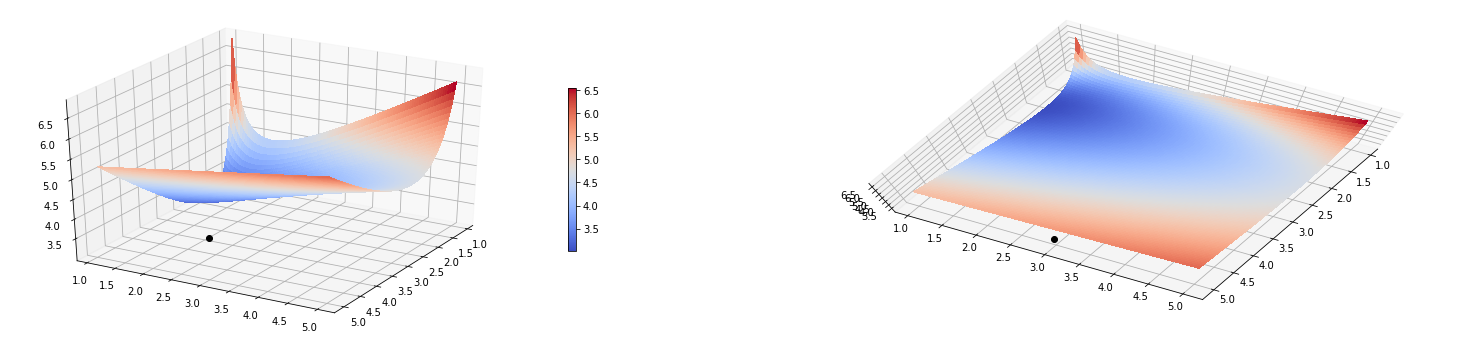

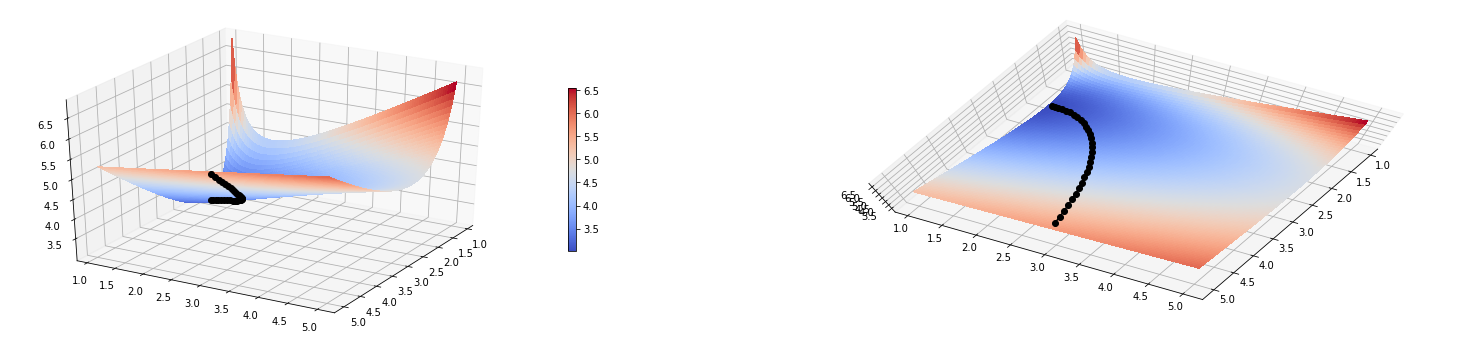

In [ ]:
%reset
x=6.0
def f(x):
    return 10.0*x-x*x
alpha=0.1
for step in range (0,25):
    x=x-alpha*(2.0*x-10.0)
    print(x,f(x))

from pylab import *

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D

def f(x1,x2):
    return x1+x2**2/(x1*x2-1)
xrange = np.linspace(1.1, 5, 100)
yrange = np.linspace(1.1, 5, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D([5], [3],[4], color="k", marker='o', zorder=10)
ax.view_init(30, 30)

cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D([5], [3],[4], color="k", marker='o', zorder=10)
ax.view_init(80, 30)

def dx1(x1,x2):
    return 1- (x2**3)/(x1*x2-1)**2

def dx2(x1,x2):
    return (2*x2*(x1*x2-1)-x1*x2**2)/(x1*x2-1)**2



x1=5
x2=3

xlist=[]
ylist=[]
zlist=[]
alpha=0.2
for step in range (0,30):
    newx1=x1-alpha*(dx1(x1,x2))
    x2=x2-alpha*(dx2(x1,x2))
    x1=newx1
    z=f(x1,x2)
    print(x1,x2,z)
    xlist.append(x1)
    ylist.append(x2)
    zlist.append(z)
    
fig = plt.figure(figsize=(26,6))

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.view_init(30,30)

cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist,zlist, color="k", marker='o', zorder=10)
ax.view_init(80, 30)


## Without main q1 (remove)

In [ ]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms
from matplotlib import pyplot as plt
import numpy as np, numpy

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

popSize     = 50 #Population size
dimension   = 2 #Numer of decision variable x 
numOfBits   = 15 #Number of bits in the chromosomes
iterations  = 100 #Number of generations to be run
dspInterval = 10
nElitists   = 1 #number of elite individuals selected
omega       = 5
crossPoints = 2 #variable not used. instead tools.cxTwoPoint
crossProb   = 0.6
flipProb    = 1. / (dimension * numOfBits) #bit mutate prob
mutateprob  = .1 #mutation prob
maxnum      = 2**numOfBits #absolute max size of number coded by binary list 1,0,0,1,1,....


toolbox = base.Toolbox()

# Attribute generator 
#                      define 'attr_bool' to be an attribute ('gene')
#                      which corresponds to integers sampled uniformly
#                      from the range [0,1] (i.e. 0 or 1 with equal
#                      probability)
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
#                         define 'individual' to be an individual
#                         consisting of numOfBits*dimension 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits*dimension)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized
# fitness function: sphere model
#
def eval_function(individual):
    sep=separatevariables(individual)
    f= (2+ (4.1*(sep[0]**2)) - (2.1*(sep[0]**4)) + ((1/3)*(sep[0]**6)) + (sep[0]*sep[1]) - (4*((sep[1]-0.05)**2)) + (4*(sep[1]**4)))
    return 1.0/(0.01+f), # DEAP doesn't allow minimisation for roulette selection, so we convert to maximisation

#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_function)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

#----------

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-5+10*numasint/maxnum #here is the range!!!!!!!!!!!!!!!!!!!!!!!!
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:numOfBits]),chrom2real(v[numOfBits:])

# def main():
#random.seed(64)

# create an initial population of individuals (where
# each individual is a list of integers)
pop = toolbox.population(n=popSize)

#     for individ in pop:
#         sep=separatevariables(individ)
#         print(sep[0],sep[1])

# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, pop))
#print(fitnesses)
for ind, fit in zip(pop, fitnesses):
    #print(ind, fit)
    ind.fitness.values = fit

print("  Evaluated %i individuals" % len(pop))

# Extracting all the fitnesses of 
fits = [ind.fitness.values[0] for ind in pop]

# Variable keeping track of the number of generations
g = 0
bestindifit = [] # variable to keep track of the best indeviduls fitness
bestindi = [] # variable to keep track of the best indeviduls
# Begin the evolution
while g < iterations:
    # A new generation
    g = g + 1
    print("-- Generation %i --" % g)
#         for individ in pop:
#             print(individ)
    
    # Select the next generation individuals
    offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))
    
#         for individ in offspring:
#             print(individ)


    # Apply crossover and mutation on the offspring
    # make pairs of offspring for crossing over
    for child1, child2 in zip(offspring[::2], offspring[1::2]):

        # cross two individuals with probability CXPB
        if random.random() < crossProb:
            #print('before crossover ',child1, child2)
            toolbox.mate(child1, child2)
            #print('after crossover ',child1, child2)

            # fitness values of the children
            # must be recalculated later
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:

        # mutate an individual with probability mutateprob
        if random.random() < mutateprob:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    #print("  Evaluated %i individuals" % len(invalid_ind))
    
    # The population is entirely replaced by the offspring
    pop[:] = offspring
    bestindi.append(tools.selBest(pop, 1)[0])
    bestindifit.append(tools.selBest(pop, 1)[0].fitness.values)
    if g%dspInterval ==0:
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]

        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

print("-- End of (successful) evolution --")

best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
print("Decoded x1, x2 is %s, %s" % (separatevariables(best_ind)))



# if __name__ == "__main__":
#     main()

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:171: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 0.6927064220801208
  Max 1.416627144539472
  Avg 1.1416457184208415
  Std 0.15558462063208683
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 0.05975877850053653
  Max 1.469658022198465
  Avg 1.2449429277600423
  Std 0.23508063994656672
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 0.0003257019482948495
  Max 1.4709754281052687
  Avg 1.309716482354425
  Std 0.32536648679255964
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 -

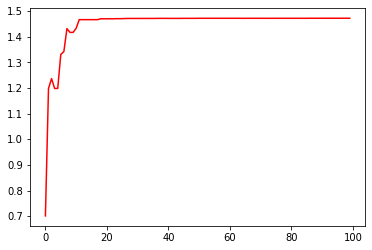

In [ ]:

plt.plot(np.array(bestindifit), 'r')

1.1 B)

## Code test Q3

### Q3.1
Encode the decision variables using Gray coding, each using 10 bits. Set the population size to 24 and randomly generate an initial population. List the 24 initial solutions in a table in the following format:

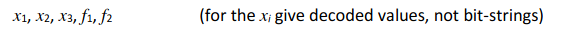

In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 8.5 MB/s 


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
[[[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], [1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]], [[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1], [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], [1, 1, 1, 1,

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


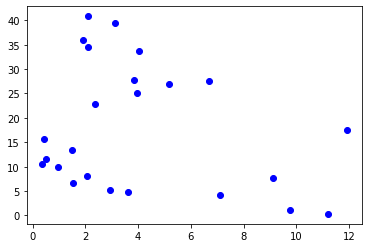

In [ ]:
%reset
#    This file is part of DEAP.
#    This implements the NSGA-II in an easy way because it makes us of DEAP subroutines
#    The non dominated sort and crowding distance are solved by a simiple call to DEAP subroutines
#    and their implementation is hidden.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import array
import random
import json

import numpy

from math import sqrt

from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence, hypervolume
from deap import creator
from deap import tools
import matplotlib.pyplot as plt

from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

numOfBits = 10#30
maxnum      = 2**numOfBits

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-4+8*numasint/maxnum
    return numinrange

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(v):
    return chrom2real(v[0:10]),chrom2real(v[10:20]), chrom2real(v[20:30])


def calcFitness(individual):
  x1,x2,x3 = separatevariables(individual)#convert from grey to binary to real number

  f1=( ((x1-0.6)/1.6)**2 + (x2/3.4)**2 + (x3-1.3)**2   )/2.0
  f2=( ((x1)/(1.9-2.3))**2 + (x2/(3.3-7.1))**2  +  (x3+4.3)**2    )/3.0
  return f1,f2    
    
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 30) #set total ind bits
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", calcFitness)
# exchangeChance = 0.9
toolbox.register("mate", tools.cxUniform)#, indpb=exchangeChance) #change cx unifrom 0.9
flipProb=1.0/9 #change to be 1/cromesome len - ???? 1/10 or 1/30 - prob 30 given the wording for chromesome!!!!
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb) 

#-------------------------------------------------------------------
from itertools import chain
from operator import attrgetter, itemgetter
def testSelect(individuals, k, nd='standard'):
  if nd == 'standard':
      pareto_fronts = tools.emo.sortNondominated(individuals, k)
  elif nd == 'log':
      pareto_fronts = tools.emo.sortLogNondominated(individuals, k)
  else:
      raise Exception('selNSGA2: The choice of non-dominated sorting '
                      'method "{0}" is invalid.'.format(nd))

  print(pareto_fronts)
  for front in pareto_fronts:
      tools.emo.assignCrowdingDist(front)

  #print('\n'.join(', '.join(str(x.fitness.values[0]) + "("+str(x.fitness.crowding_dist)+")" for x in row) for row in pareto_fronts))
  print("number of fronts is:",len(pareto_fronts))
  chosen = list(chain(*pareto_fronts[:-1]))
  k = k - len(chosen)
  if k > 0:
      sorted_front = sorted(pareto_fronts[-1], key=attrgetter("fitness.crowding_dist"), reverse=True)
      chosen.extend(sorted_front[:k])

  return chosen
#tools.emo.assignCrowdingDist(indi)
#----------------------------------------------------------------

toolbox.register("select", testSelect)#tools.selNSGA2)

def main(seed=None):
    random.seed(seed)

    NGEN = 0
    MU = 24
    CXPB = 0.9

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    # stats.register("avg", numpy.mean, axis=0)
    # stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    pop = toolbox.population(n=MU)
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in pop if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # This is just to assign the crowding distance to the individuals
    # no actual selection is done
    pop = toolbox.select(pop, len(pop))
    
    record = stats.compile(pop)
    logbook.record(gen=0, evals=len(invalid_ind), **record)
    print(logbook.stream)






    #dont need this until later on 4.5
    # Begin the generational process
    for gen in range(1, NGEN):
        # Vary the population
        offspring = tools.selTournamentDCD(pop, len(pop))
        # selTournamentDCD means Tournament selection based on dominance (D) 
        # followed by crowding distance (CD). This selection requires the 
        # individuals to have a crowding_dist attribute
        offspring = [toolbox.clone(ind) for ind in offspring]
        
        for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
        #make pairs of all (even,odd) in offspring
            if random.random() <= CXPB:
                toolbox.mate(ind1, ind2)
            
            toolbox.mutate(ind1)
            toolbox.mutate(ind2)
            del ind1.fitness.values, ind2.fitness.values
        
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation population
        pop = toolbox.select(pop + offspring, MU)#SELECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        record = stats.compile(pop)
        logbook.record(gen=gen, evals=len(invalid_ind), **record)
        print(logbook.stream)

    print("Final population hypervolume is %f" % hypervolume(pop, [11.0, 11.0]))

    popstats = []
    for ind in pop:
      x1,x2,x3 = separatevariables(ind)
      f1=( ((x1-0.6)/1.6)**2 + (x2/3.4)**2 + (x3-1.3)**2   )/2.0
      f2=( ((x1)/(1.9-2.3))**2 + (x2/(3.3-7.1))**2  +  (x3+4.3)**2    )/3.0
      popstats.append([x1,x2,x3,f1,f2])

    # print(popstats)
    print('\n'.join(', '.join(str(x) for x in row) for row in popstats))


    return pop, logbook, popstats
        
if __name__ == "__main__":
    pop, stats, popstats  = main()
    pop.sort(key=lambda x: x.fitness.values)
    
    front = numpy.array([ind.fitness.values for ind in pop])
    plt.scatter(front[:,0], front[:,1], c="b")
    plt.axis("tight")
    plt.show()
    
    

### Q3.2
Sort the solutions in the initial generation using the efficient non-dominated sorting.  
NOTE: DEAP does not implement the efficient non-dominated sorting; to get full marks you 
need to code this yourself using the algorithm specified in the lecture (Week 4). List the 
solutions together with their front number in a table in the following format and sort them 
according to the front number in an ascending order. Print out the sorted individuals in 
objective values and front number. Also show a 2D plot of the solutions in objective space, 
indicating which belong on the same fronts. In your table highlight the worst objective value 
in f1: f1* = max{f1i }, i = 1, ..., 24, and the worst objective value in f2: f2* = max{ f2i }, i=1, ..., 24.

FORMAT: f1, f2, front number 

In [ ]:
import numpy as np, numpy

# def isDominating(sol1, sol2):
#   #do here
#   return True

def dominates(X1, X2):
    # if(np.any(X1 < X2) and np.all(X1 <= X2)):
    # print(X1, X2)
    if( (X1[0]< X2[0] or X1[1]< X2[1])  and (X1[0]<= X2[0] and X1[1]<= X2[1]) ):
        return True
    else:
        return False


#Efficient Non-Dominated Sorting
def EffNonDomSort(solPN, SetOfFronts):
  x=len(SetOfFronts)
  k=1 #the front now checked
  if x>0:
    while True:
      isDominated = False
      #compare solPn with sols in fronts[k]
      #if(x>0):
      # print("k is:" ,k)
      for sol in reversed(SetOfFronts[k-1]): #check if its dominated by any of them
        if dominates(sol, solPN): 
          isDominated = True
          break

      if not isDominated:#SetOfFronts[k] contains no sol dom solPN
        # print("added to front k", k)
        SetOfFronts[k-1].append(solPN)# move PN to fronts[k]
        return k
        break
      else:
        k=k+1
        if k>x:#-1:
          # print("added new front", x+1)
          SetOfFronts.append([solPN])# move Pn to a new front
          return (x+1) 
          break
    # return #front num of solPN
  else:
    # print("added start value")
    SetOfFronts.append([solPN])
    return k

In [ ]:
print(pop[0].fitness)
#Save varaiable
popstats1=[]
print(len(popstats[0]))
popstats1=popstats
print(len(popstats1[0]))

(0.009595265371989209, 11.522858086442463)
5
5


In [ ]:
for indi in popstats1: #removes variables x1,x2,x3
  # print(indi)
  indi.pop(0)
  indi.pop(0)
  indi.pop(0)

In [ ]:
SetOfFronts = []
SolsWithFrontNum = []

popstats.sort(key=lambda tup: tup[0])#sort by f1

# print(popstats)

for sol in popstats:
  SolsWithFrontNum.append((sol[0], sol[1],EffNonDomSort(sol, SetOfFronts)))#add the front onto the population

SolsWithFrontNum.sort(key=lambda tup: tup[2])
print('\n'.join(', '.join(str(x) for x in row) for row in SolsWithFrontNum))

0.009595265371989209, 11.522858086442463, 1
1.2711514696695403, 6.585477575582151, 1
7.18638339877541, 2.7612138523091243, 1
8.152868187980255, 0.8839323886015408, 1
0.5973853302001952, 17.97774455090749, 2
3.0920811216888957, 10.003385989258717, 2
6.310258848790891, 9.164551638447348, 2
1.5103411512143885, 20.033114080737285, 3
6.671185321807861, 10.353468127475224, 3
1.579371304099535, 25.189281277502456, 4
1.9485424215983354, 22.09883969857312, 4
2.59728164435258, 21.0859656652167, 4
1.7080826006298655, 29.20331411092236, 5
2.484358741271867, 23.19812920257766, 5
3.478257757008695, 24.303875713260336, 6
3.665362567901611, 37.85210646300876, 7
3.8079606798033403, 28.84105252844476, 7
6.3610878181457515, 27.72896054536463, 7
4.05262275906995, 29.425530614738435, 8
11.14259407043457, 28.571762226418233, 8
6.5202560942230745, 46.746529706706646, 9
11.6304391411514, 32.55863676259613, 9
14.361627881601194, 29.229068639020852, 9
8.1791146884905, 55.555293498510366, 10


number of fronts is: 10


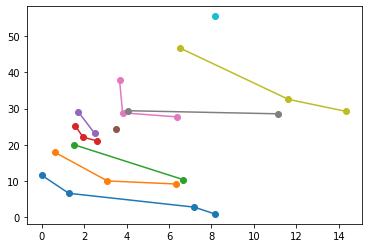

In [ ]:
from matplotlib import pyplot as plt
maxfront = SolsWithFrontNum[-1][-1]

SolsWithFrontNumSorted = SolsWithFrontNum.sort(key=lambda tup: tup[0])


print("number of fronts is:",maxfront)

for i in range(1,maxfront+1):
  frontf1 = [x[0] for x in SolsWithFrontNum if x[2] == i]
  frontf2 = [x[1] for x in SolsWithFrontNum if x[2] == i]
  # print(frontn)
  plt.plot(frontf1, frontf2, marker= 'o', label='front'+str(i))

plt.show()

### Q3.3
Calculate the crowding distance of each individual in the initial population. Add the resulting 
crowding distance of each individual to your table of 3.2 in the following format. 
f1, f2, front number, crowding distance   

In [ ]:
# import math
# #Function to find index of list
# def index_of(a,list):
#     for i in range(0,len(list)):
#         if list[i] == a:
#             return i
#     return -1

# #Function to sort by values
# def sort_by_values(list1, values): 
#     sorted_list = []
#     while(len(sorted_list)!=len(list1)):  #stuck in here
#         if index_of(min(values),values) in list1:
#             sorted_list.append(index_of(min(values),values))
#         values[index_of(min(values),values)] = math.inf
#     return sorted_list

# #Function to calculate crowding distance
# def crowding_distance(values1, values2, front):
#     distance = [0 for i in range(0,len(front))]
#     sorted1 = sort_by_values(front, values1[:])
#     sorted2 = sort_by_values(front, values2[:])
#     distance[0] = 4444444444444444
#     distance[len(front) - 1] = 4444444444444444
#     for k in range(1,len(front)-1):
#         distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
#     for k in range(1,len(front)-1):
#         distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
#     return distance #distance with [fronts]#


# #this func seemed to just do the averge for each whole front?

In [ ]:
# print(SolsWithFrontNum)
# SolsWithFrontAndCrowdingDist = []

SolsWithFrontNum.sort(key=lambda tup: tup[0])#line them up by f1
pop.sort(key=lambda tup: tup.fitness.values[0])#, reverse=True)

# for ind in pop:
#   print(ind.fitness.values[0],ind.fitness.values[1])
# for ind in SolsWithFrontNum:
#   print(ind[0],ind[1])


for idx, ind in enumerate(pop):
  ind.front = SolsWithFrontNum[idx][2]

# indexsinFronts = [] #outputs an array of arrays containing the indexes of the indi in each front
# for pop in SolsWithFrontNum:
#   #check if [ x] exists if yes then join
#   if 0 <= pop[2]-1 < len(indexsinFronts): # check if the index is within the length of the list to prove existance
#     indexsinFronts[pop[2]-1].append(SolsWithFrontNum.index(pop))#want the index of it
  
#   else: #create one and join
#     indexsinFronts.append([SolsWithFrontNum.index(pop)])
# print(indexsinFronts)

# for ind in pop:
#   print(ind.fitness.values[0],ind.fitness.values[1], ind.front)

# !pip install deap
# from deap import tools
# for i in range(1,maxfront+1):
#   indi = [x for x in pop if ind.front == i]
#   for j in indi:
#     print(j.fitness.values[0],j.fitness.values[1])

#   tools.emo.assignCrowdingDist(indi) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#   print("done with front:", i)

pop.sort(key=lambda tup: tup.front)
print("\n")

for ind in pop:
  print(ind.fitness.values[0],ind.fitness.values[1], ind.front, ind.fitness.crowding_dist)


  # from deap import tools
  #   tools.emo.assignCrowdingDist(indi) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!




0.009595265371989209 11.522858086442463 1 inf
1.2711514696695403 6.585477575582151 1 0.8524304508135145
7.18638339877541 2.7612138523091243 1 0.6904967878608161
8.152868187980255 0.8839323886015408 1 inf
0.5973853302001952 17.97774455090749 2 inf
3.0920811216888957 10.003385989258717 2 1.0
6.310258848790891 9.164551638447348 2 inf
1.5103411512143885 20.033114080737285 3 inf
6.671185321807861 10.353468127475224 3 inf
1.579371304099535 25.189281277502456 4 inf
1.9485424215983354 22.09883969857312 4 1.0
2.59728164435258 21.0859656652167 4 inf
1.7080826006298655 29.20331411092236 5 inf
2.484358741271867 23.19812920257766 5 inf
3.478257757008695 24.303875713260336 6 inf
3.665362567901611 37.85210646300876 7 inf
3.8079606798033403 28.84105252844476 7 1.0
6.3610878181457515 27.72896054536463 7 inf
4.05262275906995 29.425530614738435 8 inf
11.14259407043457 28.571762226418233 8 inf
6.5202560942230745 46.746529706706646 9 inf
11.6304391411514 32.55863676259613 9 1.0
14.361627881601194 29.2290

### Q3.4
Apply tournament selection to select parent individuals for reproduction. Consider
dominance and crowding distance in the selection. Create 24 offspring individuals. Select
individuals for crossover at a probability of 0.9 and apply uniform crossover. Apply flip
mutation at a probability that is inversely proportional to the length of the chromosome for
each bit. Plot the 24 offspring individuals together with the parents in the objective space.
Visualize the parent and offspring individuals using different colours. 

In [ ]:
offspring = tools.selTournamentDCD(pop, len(pop))



### Q3.5
Combine the 24 offspring individuals with the 24 parent individuals. Then select 24
individuals from the combined population using the crowded non-dominated sorting
method. Plot the combined population (48 individuals) in the objective space. Highlight the
24 selected solutions using a different colour. 

### Q3.6
Run the evolution for 30 generations by repeating the above steps. Calculate the
hypervolume using the worst objective values ( f1*, f2*) obtained in Question 3.2 as the
reference point (i.e. keep this as reference point for all generations) and plot the
hypervolume of the non-dominated solutions over the generations. Note that hypervolume 
is a scalar value, so you are just plotting a scalar hypervolume value (y-axis) versus
generation (x-axis), you are not asked to draw the hypervolume in f1, f2 space.
Also plot (in a separate plot) the final generation of solutions in objective space, along with
the reference point in a different colour. 